In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.shape

(303, 14)

In [4]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
X = data.drop('target', axis=1)
y = data['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
model_gini = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, random_state=42) #max_depth, min_samples_split, min_samples_leaf
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [36]:
model_entropy = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=42)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=42)

In [37]:
y_pred_gini = model_gini.predict(X_test)
y_pred_entropy = model_entropy.predict(X_test)

In [38]:
print('GINI TREE\n')
print(accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))
print('ENTROPY TREE\n')
print(accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

GINI TREE

0.7868852459016393
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.95      0.62      0.75        32

    accuracy                           0.79        61
   macro avg       0.83      0.80      0.78        61
weighted avg       0.83      0.79      0.78        61

ENTROPY TREE

0.8032786885245902
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



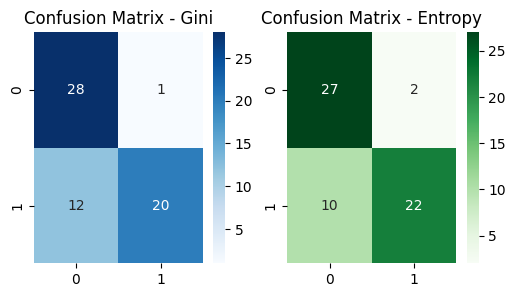

In [39]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, cmap='Blues')
plt.title('Confusion Matrix - Gini')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, cmap='Greens')
plt.title('Confusion Matrix - Entropy')
plt.show()

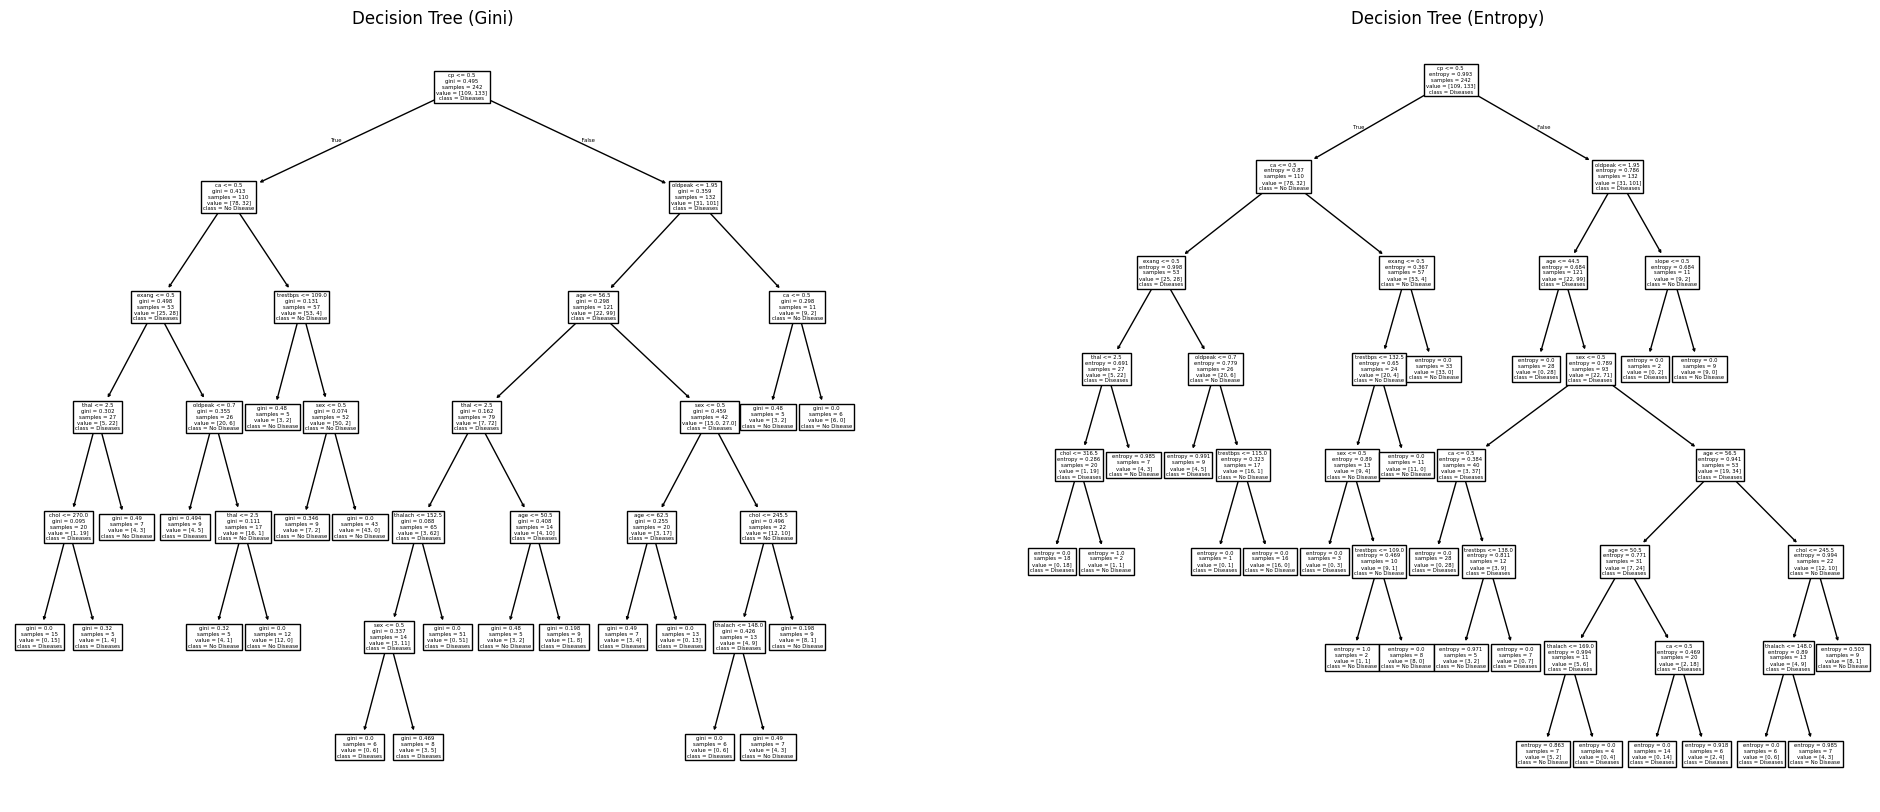

In [40]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
plot_tree(model_gini, feature_names=X.columns, class_names=['No Disease','Diseases'])
plt.title('Decision Tree (Gini)')
plt.subplot(1,2,2)
plot_tree(model_entropy, feature_names=X.columns, class_names=['No Disease','Diseases'])
plt.title('Decision Tree (Entropy)')
plt.show()